<a href="https://colab.research.google.com/github/MileneCV/Stroke_Prediction_project_2/blob/main/stroke_prediction_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**name:** Milene Carmes Vallejo

**last updated:** 11/11/2022

# Stroke Prediction Dataset 




## Project Description 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


## Data Source
**Kaggle** : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Data **Dictionary**
1) **id:** unique identifier

2) **gender:** "Male", "Female" or "Other"

3) **age:** age of the patient

4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) **ever_married:** "No" or "Yes"

7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) **Residence_type:** "Rural" or "Urban"

9) **avg_glucose_level:**  average glucose level in blood

10) **bmi:** body mass index

11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) **stroke:**1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Import libraries

In [815]:
import pandas as pd 
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Load data

In [816]:
drive.mount('/content/drive')
filename = '/content/drive/My Drive/stroke_prediction_dataset.csv'
df = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [817]:
# make a copy
df_copy = df.copy()

In [818]:
df_copy.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [819]:
# copy df
df_copy.shape

(5110, 12)

## Prepare/clean the data

### Dropping unnecessary columns.

- We will drop the `id` column since this column is a unique identifier. 
- We will then check `df_copy.info()` again to make sure that the column is dropped.

In [820]:
df_copy = df_copy.drop(columns='id')
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Duplicated Data
Checking for duplicated data:

In [821]:
df_copy.duplicated().sum()

0

There is no duplicates in the dataset

### Missing Values
Checking for missing values:


In [822]:
df_copy.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Identifying % of missing data

In [823]:
df_copy.isna().sum()/len(df_copy)*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

There are 201 missing values in bmi column (3.93%). We will fill in the missing values with the mean of bmi. 

In [824]:
# find mean of bmi
mean_bmi = df_copy['bmi'].mean()
mean_bmi

28.893236911794666

In [825]:
# replace Nan in bmi column by mean_bmi
df_copy['bmi'].fillna(mean_bmi, inplace=True)

- Checking to make sure the values for the `bmi` column were filled in.

In [826]:
df_copy.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Fixing Data Types

- We will now address the data types and make sure that they match the data dictionary.

In [827]:
df_copy.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

###Fixing any inconsistent values in columns

#### Categorical columns

In [828]:
# find categorical columns
df_types = df_copy.dtypes
string_cols = df_types[df_copy.dtypes=='object'].index
string_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

##### **gender column**

In [829]:
df_copy['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

##### **ever_married column**

In [830]:
df_copy['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

##### **work_type column**

In [831]:
df_copy['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

##### **Residence_type column**

In [832]:
df_copy['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

##### **smoking_status column**

In [833]:
df_copy['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

#### Float columns

In [834]:
# find float columns
float_cols = df_types[df_copy.dtypes=='float'].index
float_cols

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

##### **Age column**

In [835]:
# display all values to check any inconsistent values
pd.set_option("display.max_rows", None)

In [836]:
df_copy['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
45.00     85
79.00     85
53.00     85
55.00     83
50.00     83
59.00     80
31.00     79
49.00     79
56.00     77
37.00     76
61.00     76
47.00     75
44.00     75
62.00     74
40.00     74
63.00     74
41.00     73
60.00     72
38.00     72
39.00     71
42.00     71
32.00     71
80.00     70
43.00     70
34.00     68
58.00     68
48.00     66
5.00      65
23.00     64
65.00     62
26.00     62
46.00     62
71.00     61
18.00     60
66.00     60
17.00     60
81.00     60
20.00     59
8.00      58
13.00     57
25.00     57
33.00     57
82.00     56
2.00      55
30.00     55
24.00     55
27.00     55
14.00     54
35.00     54
28.00     54
69.00     54
75.00     53
64.00     53
36.00     52
16.00     52
29.00     51
76.00     50
19.00     50
67.00     49
21.00     47
68.00     47
73.00     46
3.00      46
22.00     45
72.00     45
15.00     45
70.00     45
12.00     45
77.00     42
74.00     40
9.00      38
11.00     36

##### **Avg_glucose_level column**

In [837]:
df_copy['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
72.49     5
84.10     5
89.68     4
85.81     4
71.06     4
93.74     4
60.98     4
80.08     4
69.24     4
81.51     4
86.06     4
84.40     4
93.55     4
90.42     4
78.24     4
77.67     4
80.63     4
85.84     4
89.11     4
109.51    4
56.11     4
77.55     4
80.72     4
79.89     4
114.32    4
92.82     4
100.54    4
88.83     4
84.86     4
87.72     4
67.92     4
79.81     3
82.44     3
96.02     3
93.67     3
62.60     3
78.05     3
99.44     3
65.98     3
99.76     3
95.49     3
91.82     3
81.54     3
75.06     3
79.03     3
88.65     3
85.60     3
96.84     3
109.56    3
82.57     3
88.79     3
60.22     3
77.82     3
63.98     3
86.21     3
80.57     3
82.41     3
95.87     3
69.88     3
78.93     3
94.12     3
90.00     3
103.44    3
88.51     3
76.12     3
77.91     3
90.77     3
80.92     3
107.18    3
81.68     3
78.43     3
68.40     3
84.46     3
79.33     3
88.20     3
110.38    3
57.02     3
82.39     3
71.8

In [838]:
df_copy['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
72.49     5
84.10     5
89.68     4
85.81     4
71.06     4
93.74     4
60.98     4
80.08     4
69.24     4
81.51     4
86.06     4
84.40     4
93.55     4
90.42     4
78.24     4
77.67     4
80.63     4
85.84     4
89.11     4
109.51    4
56.11     4
77.55     4
80.72     4
79.89     4
114.32    4
92.82     4
100.54    4
88.83     4
84.86     4
87.72     4
67.92     4
79.81     3
82.44     3
96.02     3
93.67     3
62.60     3
78.05     3
99.44     3
65.98     3
99.76     3
95.49     3
91.82     3
81.54     3
75.06     3
79.03     3
88.65     3
85.60     3
96.84     3
109.56    3
82.57     3
88.79     3
60.22     3
77.82     3
63.98     3
86.21     3
80.57     3
82.41     3
95.87     3
69.88     3
78.93     3
94.12     3
90.00     3
103.44    3
88.51     3
76.12     3
77.91     3
90.77     3
80.92     3
107.18    3
81.68     3
78.43     3
68.40     3
84.46     3
79.33     3
88.20     3
110.38    3
57.02     3
82.39     3
71.8

##### **bmi**

In [839]:
df_copy['bmi'].value_counts()

28.893237    201
28.700000     41
28.400000     38
27.600000     37
26.700000     37
27.700000     37
26.100000     37
27.300000     36
23.400000     36
27.000000     35
26.900000     34
25.100000     34
26.400000     34
25.500000     33
24.800000     31
28.900000     31
23.500000     31
30.300000     30
28.300000     30
29.400000     30
26.500000     30
31.400000     30
22.200000     30
28.100000     29
27.500000     29
26.600000     29
29.100000     29
24.200000     29
27.100000     28
24.000000     28
25.300000     28
24.100000     28
28.000000     28
32.300000     28
27.900000     28
23.000000     27
21.500000     27
30.000000     27
24.900000     27
26.200000     27
25.000000     27
29.700000     27
28.500000     27
28.600000     27
30.900000     27
31.500000     27
30.100000     26
29.500000     26
28.800000     26
31.100000     26
29.600000     26
29.200000     26
29.900000     26
29.000000     26
25.400000     26
24.500000     26
24.300000     26
20.100000     25
28.200000     

#### Integer column

In [840]:
# find integer columns
integer_cols = df_types[df_copy.dtypes=='int64'].index
integer_cols

Index(['hypertension', 'heart_disease', 'stroke'], dtype='object')

##### **hypertension column**

In [841]:
df_copy['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

##### **heart_disease column**

In [842]:
df_copy['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

##### **stroke column**

In [843]:
df_copy['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### Summary statistics for numeric columns

In [844]:
df_copy.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Exploratory Visual and Analysis

#### Univariate visuals for the target and all features

In [845]:
# to make easer the vialization I will replace 0:no and 1:yes
df_string = df_copy.copy()
df_string['stroke'] = df_string['stroke'].replace({0:'no', 1:'yes'})
df_string['hypertension'] = df_string['hypertension'].replace({0:'no', 1:'yes'})
df_string['heart_disease'] = df_string['heart_disease'].replace({0:'no', 1:'yes'})


In [846]:
# select categorical columns
df_types = df_string.dtypes
string_cols = df_types[df_string.dtypes=='object'].index
string_cols

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

I will create a function to plot all string columns

In [847]:
def plot_bar_all_features(df1,x, y):
  fig, ax = plt.subplots(figsize=(8,5))
  counts_x = df1[x].value_counts(normalize=True)
  print(f'Value_counts {x}')
  print(counts_x)
  print('\n', '\n')
  counts_x.plot(kind='barh')
 
  ax.set_title(f'Frequencies of {y}', fontsize = 20, fontweight = 'bold');
  ax.set_ylabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
  ax.set_xlabel('Normalize Counts', fontsize = 15, fontweight = 'bold')
 


Value_counts gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

 



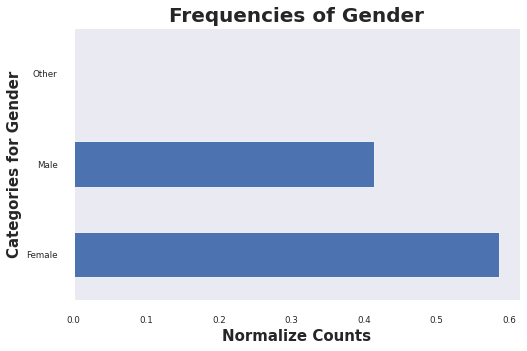

In [848]:
plot_bar_all_features(df_string, 'gender', 'Gender')

There are more female about 60%, male are about 40%. 

---



Value_counts hypertension
no     0.902544
yes    0.097456
Name: hypertension, dtype: float64

 



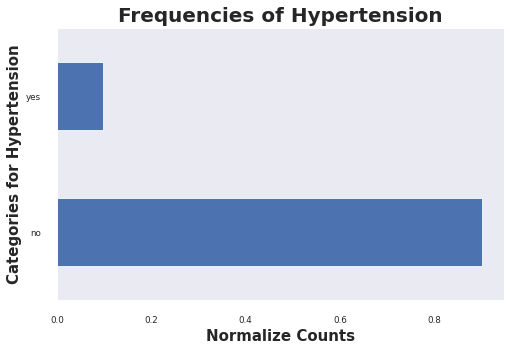

In [849]:
plot_bar_all_features(df_string, 'hypertension', 'Hypertension')

About 90% of patients don't have hypertension and 10% have hypertension

Value_counts heart_disease
no     0.945988
yes    0.054012
Name: heart_disease, dtype: float64

 



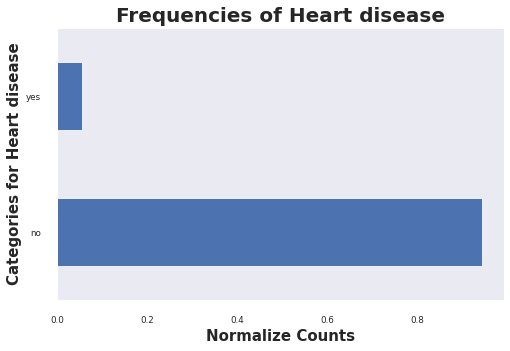

In [850]:
plot_bar_all_features(df_string, 'heart_disease', 'Heart disease')

About 95% of patinents have heart disease

Value_counts ever_married
Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64

 



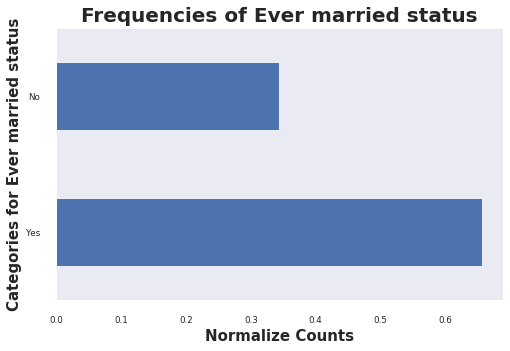

In [851]:
plot_bar_all_features(df_string, 'ever_married', 'Ever married status')

About 65% of patients are married.

Value_counts work_type
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

 



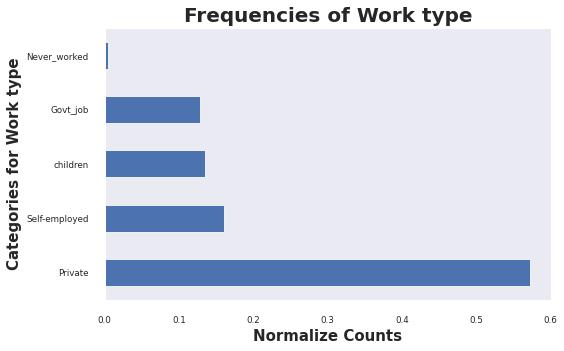

In [852]:
plot_bar_all_features(df_string, 'work_type', 'Work type')

Most of patients have private jobs. 

Value_counts Residence_type
Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64

 



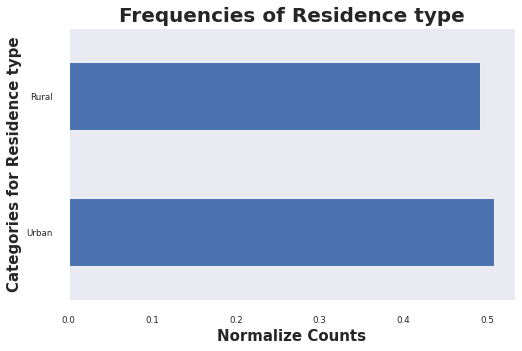

In [853]:
plot_bar_all_features(df_string, 'Residence_type', 'Residence type')

It is very similar the type of residence almost 50% urban and rural. 

Value_counts smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

 



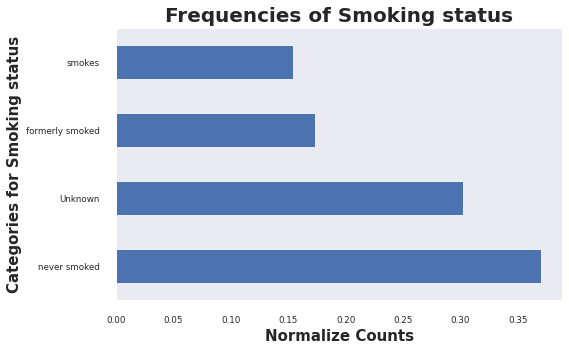

In [854]:
plot_bar_all_features(df_string, 'smoking_status', 'Smoking status')

Most of patients, more than 35% never smoked. But the percentage of unknowm is high, about 30%. 

Value_counts stroke
no     0.951272
yes    0.048728
Name: stroke, dtype: float64

 



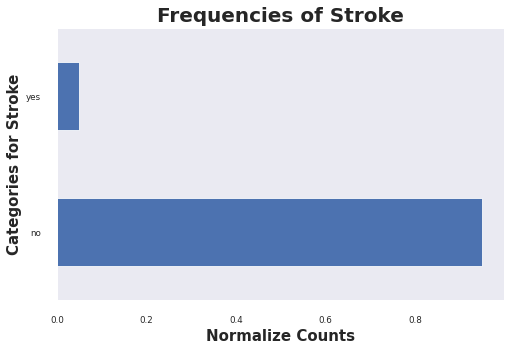

In [855]:
plot_bar_all_features(df_string, 'stroke', 'Stroke')

Most of patients, about 95% didn't have stroke and 5% had. 

I will create a function to make histplot to numbers columns

In [856]:
def histplot_all_features(df,col,y):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(data=df,x = col)
    mean_value = df[col].mean()
    ax.axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}")
    ax.legend()

    ax.set_title(f'Distribution of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_ylabel(f'Count', fontsize = 15, fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 15, fontweight = 'bold')
    #plt.tight_layout()
    plt.show()

In [857]:
# find number columns
number_cols = df_types[df_string.dtypes=='float'].index
number_cols

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

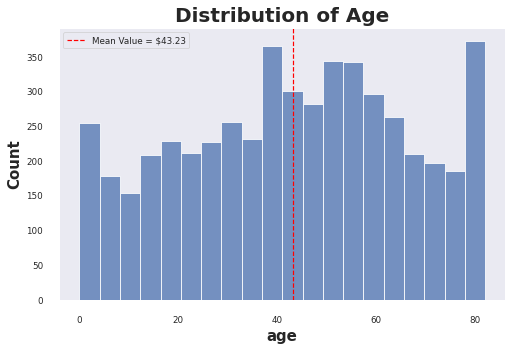

In [858]:
histplot_all_features(df_string,'age', 'Age')

The age of patients is very different there are babys with months to old people with 80 years old. The mean is 43.

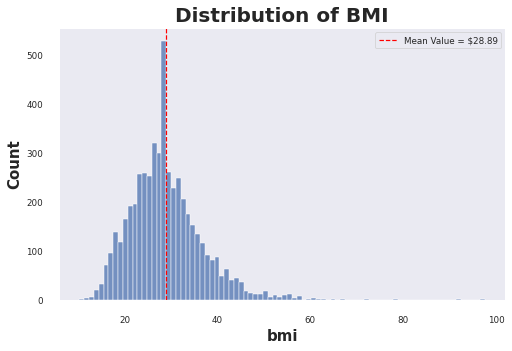

In [859]:
histplot_all_features(df_string,'bmi', 'BMI')

Most of the pacients have bmi between 20 to 40. The mean is 28.9

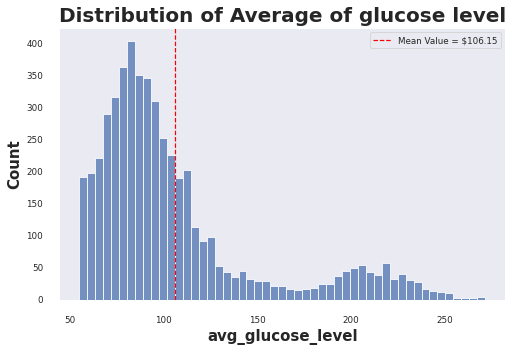

In [860]:
histplot_all_features(df_string,'avg_glucose_level', 'Average of glucose level')

Most of patients have normal level of glucose, below 100. 

#### Comparation of all features in patients who had a stroke and didn't have. 

As we see in barplot with stroke column  the dataset is unbalaced: 95% of patients didn't have stroke and less than 5% of patients had a stroke. Now I will compare all features in patients who had stroke and didn't have stroke. 


Let's groupby stroke to investigate the average of patients who had stroke and didn't.


In [861]:
stroke_groupby = df_string.groupby('stroke')
for col in df_string.columns:
  print('\n', col)
  display(stroke_groupby[col].describe())
  print('\n')
  print('\n')



 gender


,count,unique,top,freq
stroke,,,,
no,4861,3,Female,2853
yes,249,2,Female,141







 age


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
no,4861.0,41.971545,22.291940,0.08,24.0,43.0,59.0,82.0
yes,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0







 hypertension


,count,unique,top,freq
stroke,,,,
no,4861,2,no,4429
yes,249,2,no,183







 heart_disease


,count,unique,top,freq
stroke,,,,
no,4861,2,no,4632
yes,249,2,no,202







 ever_married


,count,unique,top,freq
stroke,,,,
no,4861,2,Yes,3133
yes,249,2,Yes,220







 work_type


,count,unique,top,freq
stroke,,,,
no,4861,5,Private,2776
yes,249,4,Private,149







 Residence_type


,count,unique,top,freq
stroke,,,,
no,4861,2,Urban,2461
yes,249,2,Urban,135







 avg_glucose_level


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
no,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
yes,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74







 bmi


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
no,4861.0,28.825388,7.776203,10.3,23.6,28.300000,32.8,97.6
yes,249.0,30.217789,5.825589,16.9,27.0,28.893237,32.5,56.6







 smoking_status


,count,unique,top,freq
stroke,,,,
no,4861,4,never smoked,1802
yes,249,4,never smoked,90







 stroke


,count,unique,top,freq
stroke,,,,
no,4861,1,no,4861
yes,249,1,yes,249


# Explanotory Visuals and Analysis

Split the dataset in patients who had stroke or not and investigate possible correlation with stroke and other features. 

In [862]:
# had stroke 
df_stroke = df_string.loc[df_string['stroke']=='yes']
# no stroke
df_no_stroke = df_string.loc[df_string['stroke']=='no']


##### Create a function to plot a boxplot for the selected column

In [863]:
def outliers_check(df1,df2,col):
  # function to plot a boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  sns.boxplot(data=df1, x = col, ax = axes[0])

  ## Updating title of top graph to df1  
  axes[0].set_title(f' Outliers of {col} in patients who had stoke', fontsize = 15, fontweight = 'bold')

  sns.boxplot(data=df2, x = col, ax = axes[1])

  ## Updating title of top graph to df 2 
  axes[1].set_title(f'Outliers of {col} in patients who did not have stroke', fontsize = 15, fontweight = 'bold' )

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

##### Create a function to plot a histplot for the selected column

In [864]:
def histplot_function(df1,df2,col):
  # function to plot a histogram for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  # df1:
  sns.histplot(data=df1,x = col,ax = axes[0])
  mean_value = df1[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);
  axes[0].legend()

  med_value = df1[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");
  axes[0].legend()
  axes[0].set_title(f' Distribution of {col} in patients who had stoke', fontsize = 15, fontweight = 'bold')

  #df2
  sns.histplot(data=df2,x = col,ax = axes[1])
  mean_value = df2[col].mean()
  axes[1].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);
  axes[1].legend()

  med_value = df2[col].median()
  axes[1].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");
  axes[1].legend()


  ## Updating title of top graph to df 2 
  axes[1].set_title(f'Distribution of {col} in patients who did not have stroke', fontsize = 15, fontweight = 'bold' )

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

##### Create a function to plot a barplot 

In [890]:
def plot_bar(df1,df2,x):
    ## Make a larger fig/ax before plotting
    fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
    ## counts, counts up the categories, sort the values, then puts them in a data frame.
    # count df1 = stroke
    df1[x] = df1[x].replace({0:'no', 1:'yes'})
    counts_stroke = df1[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
    ## ploting the barplot of df_stroke
    sns.barplot(data=counts_stroke,x=counts_stroke.index, y = counts_stroke[x], ax = axes[0])
    axes[0].set_title('had stroke', fontsize = 15, fontweight = 'bold')
    #sns.color_palette("rocket")
    # count df2= no_stroke 
    counts_no_stroke = df2[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
    df2[x] = df2[x].replace({0:'no', 1:'yes'})
    ## ploting the barplot of df_no_stroke
    sns.barplot(data=counts_no_stroke,x=counts_no_stroke.index, y = counts_no_stroke[x], ax = axes[1])
    axes[1].set_title('no stroke', fontsize = 15, fontweight = 'bold' )
    df2[x] = df2[x].replace({0:'no', 1:'yes'})
    axes[0].set_ylabel('Normalize count', fontsize = 20)
    axes[1].set_ylabel('')
        
    fig.suptitle(f'{x} in patients who:', fontsize = 20, fontweight = 'bold', y = 1.05)
    plt.tight_layout()
    plt.show()

## Identifying correlations with heatmap.

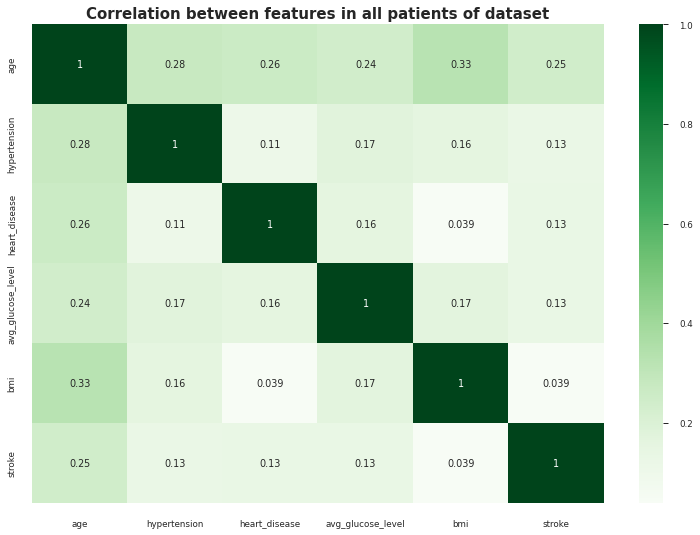

In [866]:
corr = df_copy.corr()
sns.heatmap(corr, cmap='Greens', annot = True)
plt.title('Correlation between features in all patients of dataset', fontsize = 15, fontweight = 'bold')
plt.show()

As we can see in correlation heatmap, stroke has a higher correlation with age (0.25) and mild correlation with hypertension, heart_disease and avg_glucose_level. 

Let's explore this correlation. 

###### **Age distribution** 

What is the age of patients who had stroke?

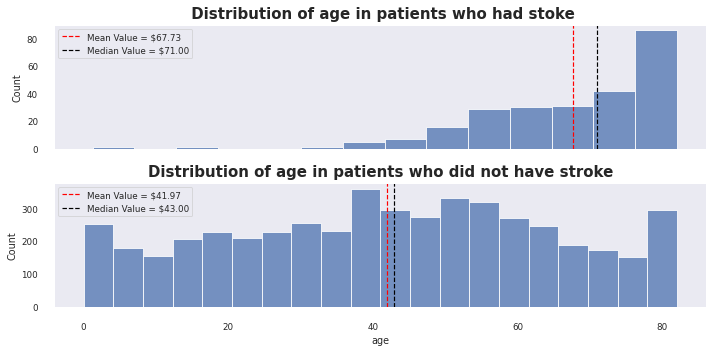

In [867]:
histplot_function(df_stroke, df_no_stroke, 'age')

Most of patients who had stroke are older than 40 years old and the median age is 71 years old. In patients who didn't have stroke the age goes to 0 to 80 years old and the median is 43 years old.

Checking Outliers in age

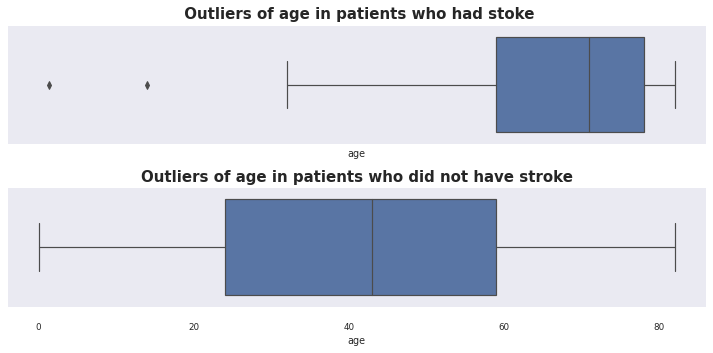

In [868]:
outliers_check(df_stroke, df_no_stroke, 'age')

We can see only 2 outliers in patients who had stroke 

###### **Average of glucose level distribution** 

If patient has high glucose level does he has more proprability to have stroke?

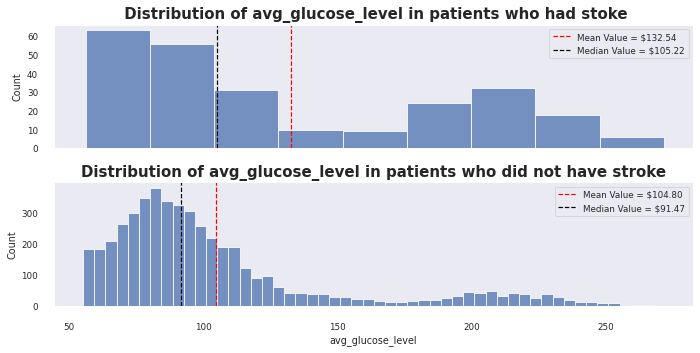

In [869]:
histplot_function(df_stroke, df_no_stroke, 'avg_glucose_level')

Most of patients have normal glucose levels (less than 100). The mean in patients who had stroke is higher (132.54) than in patients who didn't have stroke (104,80). So we can say if patient has high glucose level he has more proprability to have stroke.

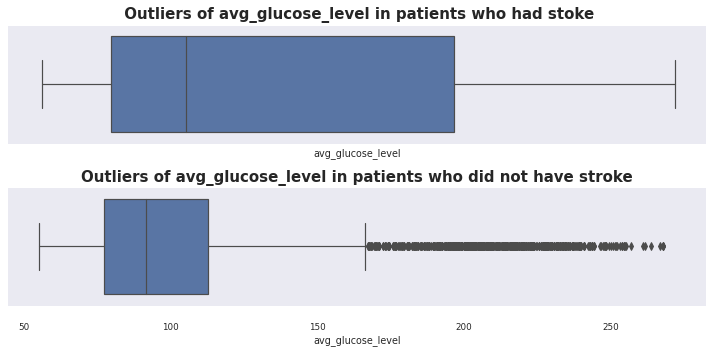

In [870]:
outliers_check(df_stroke, df_no_stroke, 'avg_glucose_level')

In patients who didn't have stroke there are more outliers in average of glucose level.    

###### **Bmi distribution**

If patients has high bmi does he has more proprability to have stroke?

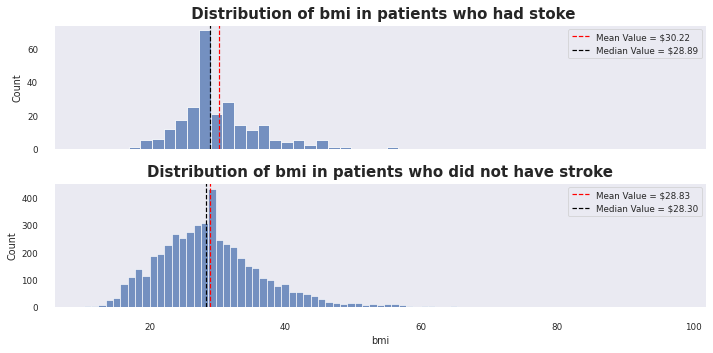

In [871]:
histplot_function(df_stroke, df_no_stroke, 'bmi')

Bmi is very similar in patients who had stroke and who didn't has stroke. So we can not say if patient has high bmi he has more proprability to have stroke.

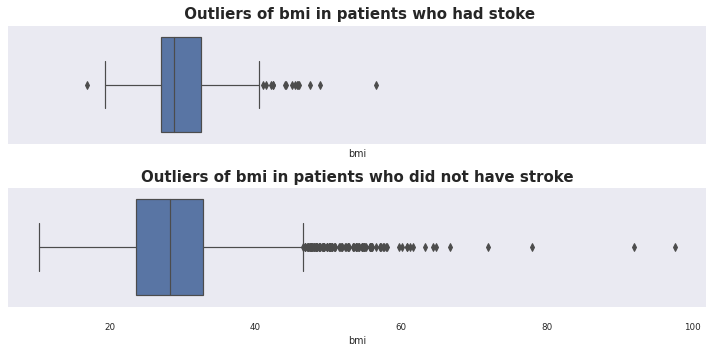

In [872]:
outliers_check(df_stroke, df_no_stroke, 'bmi')

In patients who didn't have stroke there are more outliers in bmi. The max in patients who had stroke is about 60 and in patients who didn't have the max is about 100

###### **Ever married distribution**

Marital status have any correlation with stroke?  

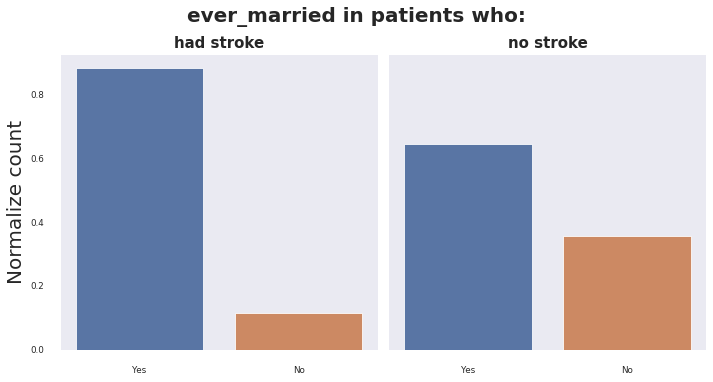

In [891]:
plot_bar(df_stroke, df_no_stroke, 'ever_married')


In patients who didn't have stroke the number of no married is higher (about 30%) than in patients who had stroke (less than 10% is married). It is because this group has younger people than in patients who had stroke.

We can not say that if the patient is married he has more probabilty to has stroke In my control group, no_stroke group,  the number of married also is higher than no married patients. 

###### **Gender distribution**

Stroke is more common in Woman or men?

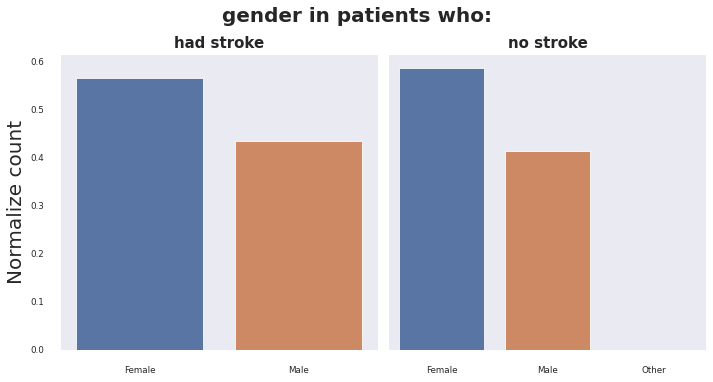

In [892]:
plot_bar(df_stroke, df_no_stroke, 'gender')

I will check the number with value_counts: 

In [875]:
df_stroke['gender'].value_counts(normalize=True)

Female    0.566265
Male      0.433735
Name: gender, dtype: float64

In [876]:
df_no_stroke['gender'].value_counts(normalize=True)

Female    0.586916
Male      0.412878
Other     0.000206
Name: gender, dtype: float64

It is very similar in both dataset of stroke and no stroke, there are more female. We can say that that stroke is more common in female 

###### **Work_type distribution**

Work type has any correlation with stroke?  

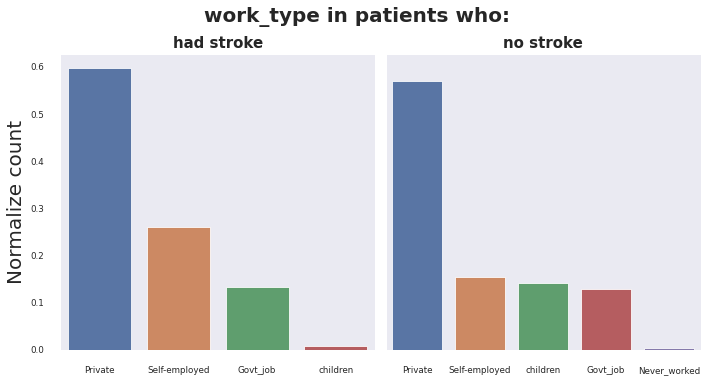

In [893]:
plot_bar(df_stroke, df_no_stroke, 'work_type')

In patients who did not have stroke there are more children. In both group there are more people working in private and self-employed. We can not say that work has a correlation with stroke.

###### **Residence type distribution**

Residence has any correlation with stroke?  

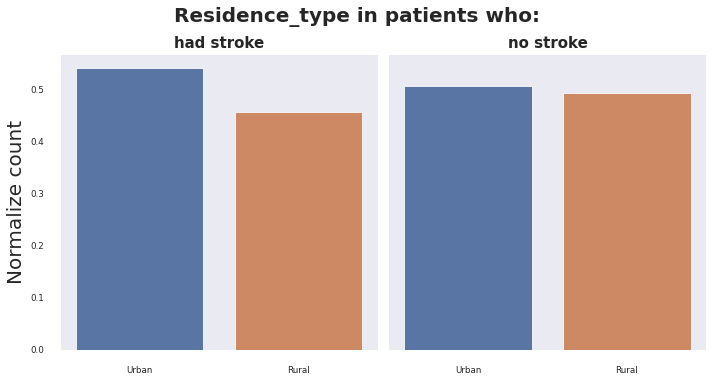

In [894]:
plot_bar(df_stroke, df_no_stroke, 'Residence_type')

Patients who had stroke about 55% live in urban area and 45% in rural area. In patients who did not have stroke is very similar the type of residence. Maybe we can say that the live-style in urban residence can has a correlation with stroke. 


###### **Smoking_status distribution**

If patient smokes or smoked does he has more proprability to have stroke?

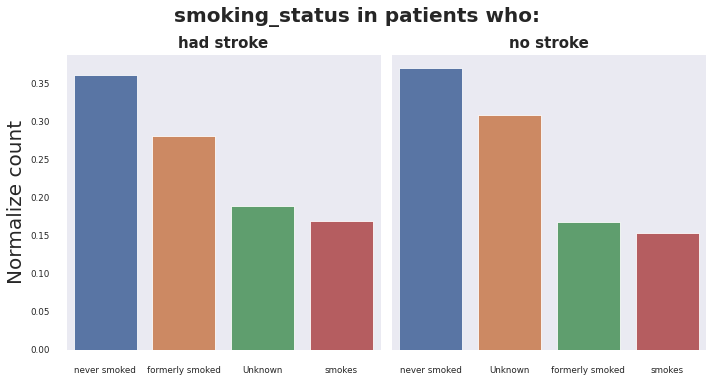

In [895]:
plot_bar(df_stroke, df_no_stroke, 'smoking_status')

The number of patients who had stroke that formerly smoked is higher (more than 25%) than in patients who did not have stroke (about 18%). In no stroke group the unknow status is bigger (about 30%) than in stroke group (about 18%). We can not say that if patient smokes or smoked he has more proprability to have stroke because the number of unknow is high. 

###### **Hypertension distribution**

 If patients has hypertension does he has more proprability to have stroke?

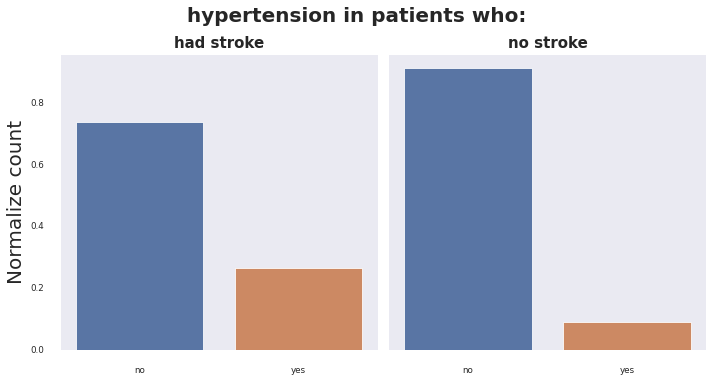

In [896]:
plot_bar(df_stroke, df_no_stroke, 'hypertension')

In patients who had stroke the number of hypertension is higher (about 25%) than in patients who didn't have stroke (less than 10%). So we can say if patients have hypertension they have more proprability to have stroke. 

###### **Heart disease distribution** 

 If patient has heart disease does he has more proprability to have stroke?

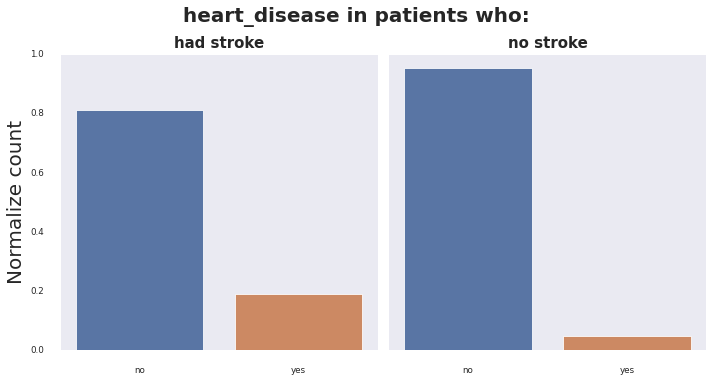

In [897]:
plot_bar(df_stroke, df_no_stroke, 'heart_disease')

In patients who had stroke about 20% have heart disease and in patients who didn't have stroke less than 5% have heart disease. So we can say if the patient has heart disease he has more proprability to have stroke.

## Multiple variables exploratory visualizations

### Correlation between heart disease, avg_glucose and stroke 

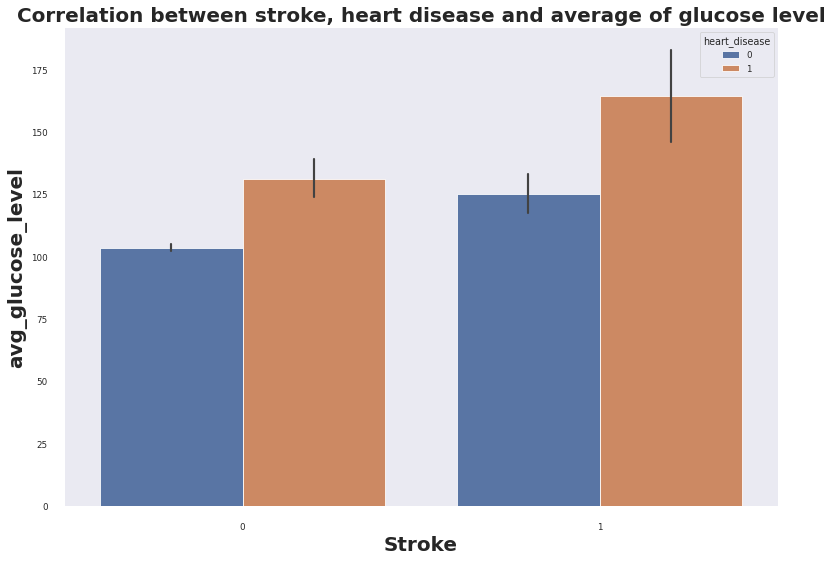

In [882]:
sns.set_style('dark')
sns.set_context("paper")

sns.barplot(data=df_copy, hue = 'heart_disease', y = 'avg_glucose_level', x= 'stroke')
plt.title('Correlation between stroke, heart disease and average of glucose level', fontsize = 20, fontweight = 'bold' )
plt.xlabel('Stroke', fontsize=20, fontweight = 'bold')
plt.ylabel('avg_glucose_level', fontsize=20, fontweight = 'bold')
plt.show()

Patients who have high level of glucose had stroke (1) and have heart disease(1). 

### Correlation beteween age, avg_glucose and stroke 

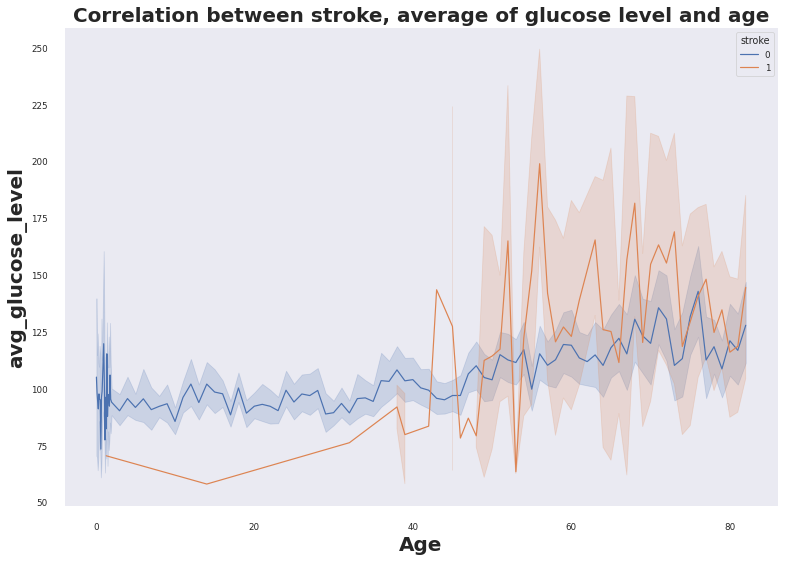

In [883]:

sns.lineplot(df_copy['age'], df_copy['avg_glucose_level'], hue=df_copy['stroke'])
plt.title('Correlation between stroke, average of glucose level and age', fontsize = 20, fontweight = 'bold' )
plt.xlabel('Age', fontsize=20, fontweight = 'bold')
plt.ylabel('avg_glucose_level', fontsize=20, fontweight = 'bold')

plt.show()

Patients who had stroke (1) are older than 40 years old and have high glucose level than in patients who didn't have stroke (0). 

###Correlation between average of glucose, hypertension and stroke

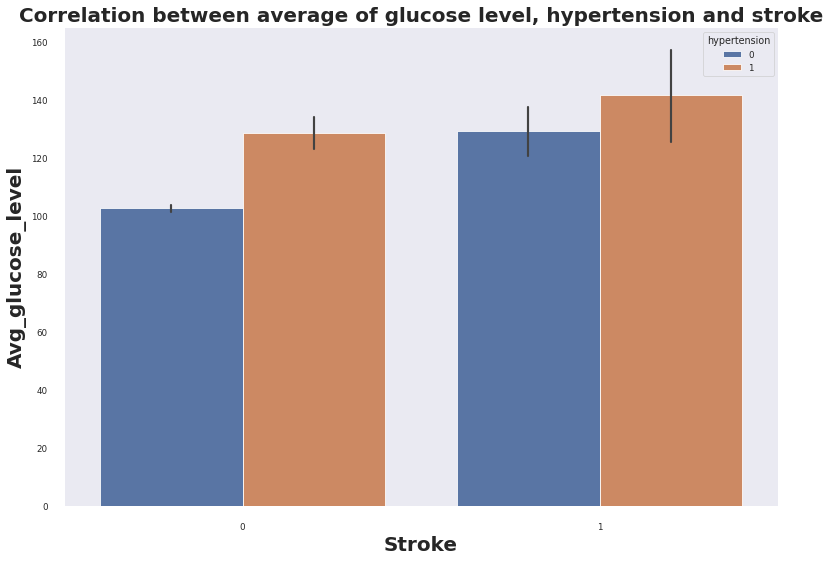

In [884]:
sns.barplot(data=df_copy, hue= 'hypertension', y = 'avg_glucose_level', x= 'stroke')
plt.title('Correlation between average of glucose level, hypertension and stroke', fontsize = 20, fontweight = 'bold' )
plt.xlabel('Stroke', fontsize=20, fontweight = 'bold')
plt.ylabel('Avg_glucose_level', fontsize=20, fontweight = 'bold')
plt.show()


Patients who have higer levels of glucose have hypertension and had stroke. 